Football is one of the most loved sports worldwide. The FIFA World Cup, a global football sporting event that takes place every four years, is in Qatar this year. This dataset contains 30,000 tweets from the first day of the FIFA World Cup 2022.
https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets

## Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!pip install textblob
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
df=pd.read_csv("fifa_world_cup_2022_tweets.csv")

In [3]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [4]:
df.tail()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive
22523,22523,2022-11-20 00:00:00+00:00,24,Twitter Web App,How to buy $SOT on PinkSale?🤔\n\nHave you been...,neutral


## EDA - Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64

In [7]:
df.shape

(22524, 6)

<AxesSubplot:>

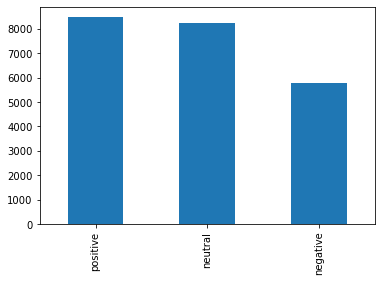

In [8]:
df["Sentiment"].value_counts().plot.bar()

In [9]:
df["Tweet"]=df["Tweet"].str.lower() #küçük harfe çevrildi
df["Tweet"]=df["Tweet"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["Tweet"]=df["Tweet"].str.replace("\d+","") #d digit rakamları kaldırır
df["Tweet"]=df["Tweet"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [10]:
df["Sentiment"].replace({"positive":2,"neutral":1,"negative":0},inplace=True)

In [11]:
df[["Tweet","Sentiment"]]

,Tweet,Sentiment
0,what are we drinking today tucantribe madbear...,1
1,amazing canadasocceren worldcup launch video ...,2
2,worth reading while watching worldcup httpstco...,2
3,golden maknae shinning bright httpstcoayzbzgt...,2
4,if the bbc cares so much about human rights ho...,0
...,...,...
22519,here we go world cup worldcup,2
22520,anderlecht confirms former viborg ffs jesper f...,1
22521,great thread to read before the start of world...,2
22522,raphinha wants brazil to be united at the worl...,2


## Apply ML Algorithms

In [12]:
x=df.Tweet
y=df.Sentiment

In [13]:
vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(x)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [16]:
L = LogisticRegression()
L.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_predict = L.predict(x_test)

In [18]:
accuracy_score(y_test , y_predict)

0.7061260728026043

In [19]:
mb=MultinomialNB()
mb.fit(x_train, y_train)

MultinomialNB()

In [20]:
mb_predict = mb.predict(x_test)

In [21]:
accuracy_score(y_test , mb_predict)

0.6830423202130808

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud

In [24]:
def wc(data,bgcolor="white"):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [25]:
negativedf=df[df['Sentiment']==0]['Tweet']
positivedf=df[df['Sentiment']==2]['Tweet']
neutraldf=df[df['Sentiment']==1]['Tweet']

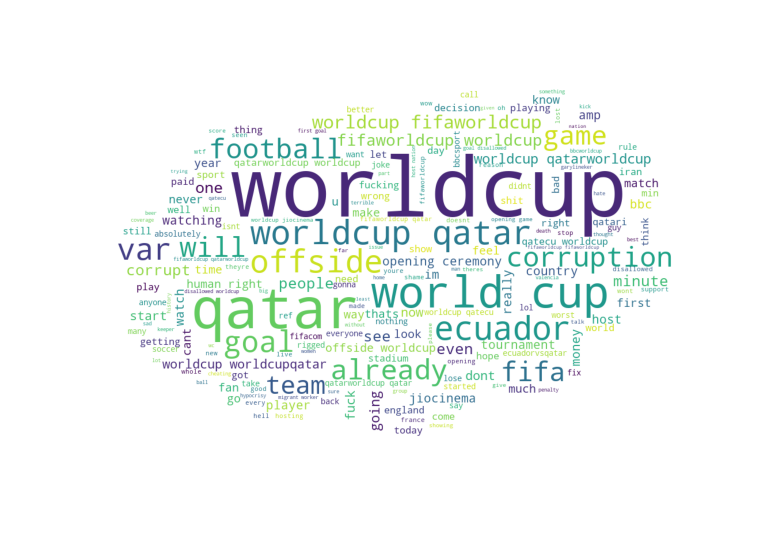

In [26]:
wc(negativedf,'white')

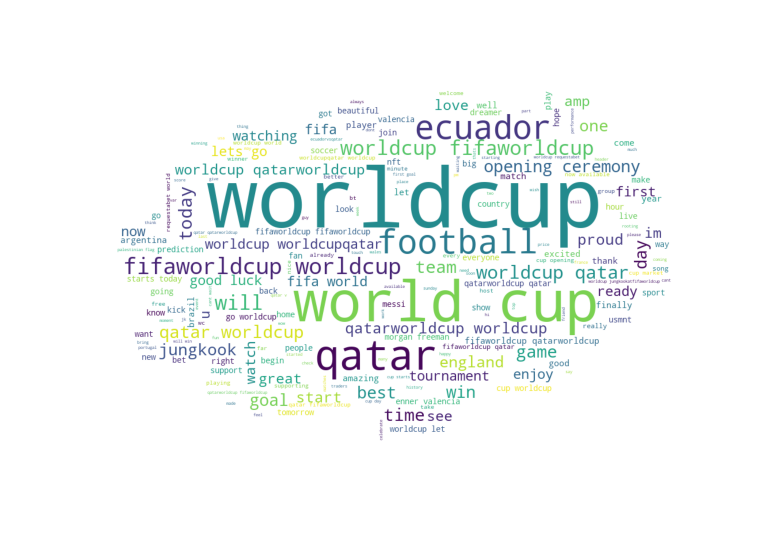

In [27]:
wc(positivedf,'white')

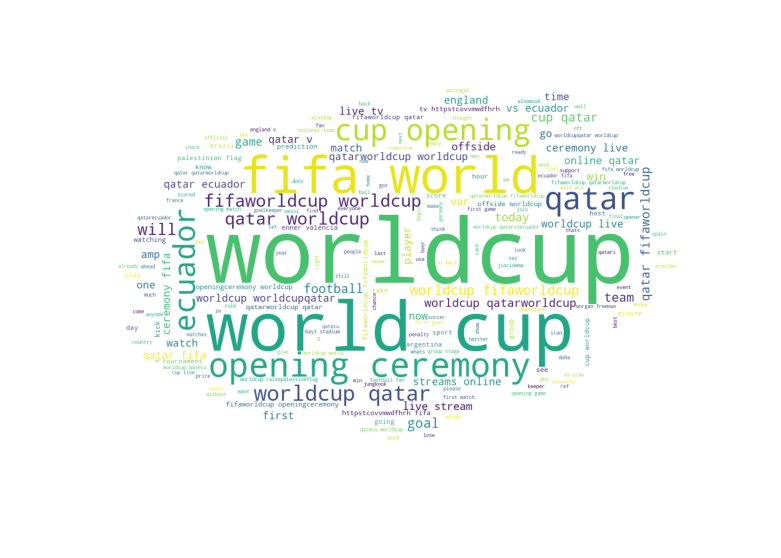

In [28]:
wc(neutraldf,'white')